# Flower Classification using CNN
## improving model with data augmantation
## implementing transfer learning

Data Source: flowers dataset from google website and store it locally.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

## Loading flowers data

In [3]:
# defining path
data_dir="D:\\G RAJESH\\UOH MBA\\DA BA\\git_hub\\projects\\flower_classification_coverting_image_array_CNN__dataAugmentation\\flower_photos"

In [4]:
data_dir

'D:\\G RAJESH\\UOH MBA\\DA BA\\git_hub\\projects\\flower_classification_coverting_image_array_CNN__dataAugmentation\\flower_photos'

In [5]:
#creating winddows path 

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/G RAJESH/UOH MBA/DA BA/git_hub/projects/flower_classification_coverting_image_array_CNN__dataAugmentation/flower_photos')

In [6]:
#reading all image paths and checking first 5 paths
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('D:/G RAJESH/UOH MBA/DA BA/git_hub/projects/flower_classification_coverting_image_array_CNN__dataAugmentation/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('D:/G RAJESH/UOH MBA/DA BA/git_hub/projects/flower_classification_coverting_image_array_CNN__dataAugmentation/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('D:/G RAJESH/UOH MBA/DA BA/git_hub/projects/flower_classification_coverting_image_array_CNN__dataAugmentation/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('D:/G RAJESH/UOH MBA/DA BA/git_hub/projects/flower_classification_coverting_image_array_CNN__dataAugmentation/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('D:/G RAJESH/UOH MBA/DA BA/git_hub/projects/flower_classification_coverting_image_array_CNN__dataAugmentation/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
#counting no. of paths in total
print(len(list(data_dir.glob('*/*.jpg'))))

3670


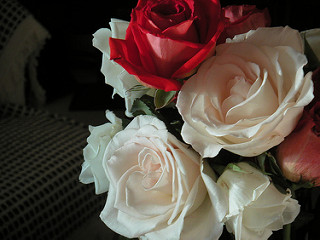

In [8]:
#seeing rose image
PIL.Image.open(str(list(data_dir.glob('roses/*'))[1]))

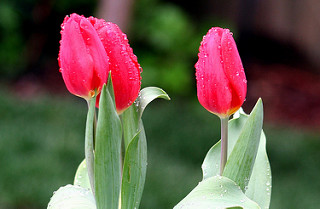

In [9]:
#seeing tulip image
PIL.Image.open(str(list(data_dir.glob('tulips/*'))[0]))

## Read flowers images from disk into numpy array using opencv

In [10]:
# creating dictinary
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
# creating dictionary to label
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
# converting images into numbers and resizing them

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [13]:
#conveting into numpy array
X = np.array(X)
y = np.array(y)

In [14]:
type(X)

numpy.ndarray

## splitting into train and test data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Build convolutional neural network and traing it

In [30]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)              

Epoch 1/5
86/86 [==============================] - 19s 206ms/step - loss: 1.3060 - accuracy: 0.4582
Epoch 2/5
86/86 [==============================] - 21s 242ms/step - loss: 0.9543 - accuracy: 0.6326
Epoch 3/5
86/86 [==============================] - 21s 247ms/step - loss: 0.8043 - accuracy: 0.7002
Epoch 4/5
86/86 [==============================] - 23s 267ms/step - loss: 0.6134 - accuracy: 0.7762
Epoch 5/5
86/86 [==============================] - 24s 283ms/step - loss: 0.4149 - accuracy: 0.8583


In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (32, 90, 90, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (32, 90, 90, 32)          4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (32, 45, 45, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (32, 45, 45, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 22, 22, 64)        

In [20]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 79ms/step - loss: 0.9397 - accuracy: 0.6667


[0.9397312998771667, 0.6666666865348816]

**Here we see that while train accuracy is very high (85%), the test accuracy is significantly low (65%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

## Improving Test Accuracy Using Data Augmentation</h3>

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

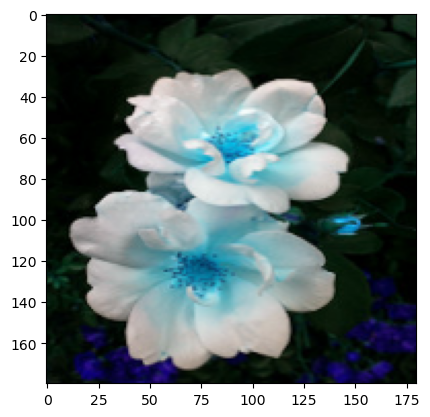

In [36]:

plt.imshow(X[0])

**Newly generated training sample using data augmentation**

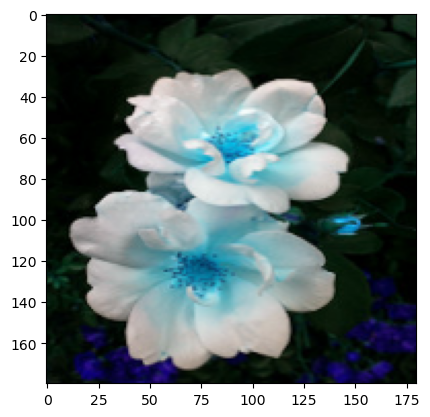

In [37]:

plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Traing the model using data augmentation and a drop out layer</h3>

In [38]:
num_classes = 5

model_da = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_da.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model_da.fit(X_train_scaled, y_train, epochs=5)    

Epoch 1/5
86/86 [==============================] - 47s 492ms/step - loss: 1.4030 - accuracy: 0.4099
Epoch 2/5
86/86 [==============================] - 38s 438ms/step - loss: 1.0447 - accuracy: 0.5850
Epoch 3/5
86/86 [==============================] - 38s 442ms/step - loss: 0.9507 - accuracy: 0.6323
Epoch 4/5
86/86 [==============================] - 38s 437ms/step - loss: 0.8534 - accuracy: 0.6686
Epoch 5/5
86/86 [==============================] - 37s 433ms/step - loss: 0.8221 - accuracy: 0.6820


In [39]:
model_da.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 68ms/step - loss: 0.8548 - accuracy: 0.6710


[0.8547958731651306, 0.671023964881897]

Using Data augmentation, we resolved Overfitting problem, but test data accuracy has improved, but it is not that great...
probably, we need lot more data to train model

## Transfer Learning approach

In [65]:
del mod

In [67]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer_ = hub.KerasLayer(
    feature_extractor_model, input_shape=(180, 180, 3), trainable=False)

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=3)

Epoch 1/3
86/86 [==============================] - 103s 1s/step - loss: 0.7930 - acc: 0.7155
Epoch 2/3
86/86 [==============================] - 85s 993ms/step - loss: 0.4185 - acc: 0.8565
Epoch 3/3
29/86 [=========>....................] - ETA: 56s - loss: 0.3340 - acc: 0.8825

In [100]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.3703 - acc: 0.8682


[0.37029528617858887, 0.8681917190551758]

## Conclusion

After implementing Transfer Learning, accuracy while training increased to 88% and on validation increased to 86% <br> Hence, we can conclude that Transfer learning saves computational resources and time